In [120]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [121]:
%store -r train
%store -r test

In [122]:
print(train.shape)
print(test.shape)

(1453, 213)
(1459, 211)


In [123]:
y = train.log_SalePrice
X = train.drop(['SalePrice', 'Id', 'log_SalePrice'], axis=1)
### test = test.drop('Id', axis=1). will drop further down
print(test.shape)
print(X.shape)
print(y.shape)

(1459, 211)
(1453, 210)
(1453,)


## Train_Test_Split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [66]:
ols = LinearRegression()
model = ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.951064
--------------------------------------------------
R^2 for test  set: 0.910646


In [67]:
predictions = ols.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.013352824899056804


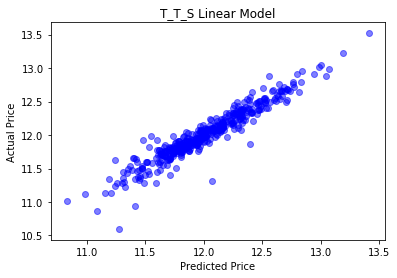

In [68]:
plt.scatter(predictions, y_test, alpha=.5,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('T_T_S Linear Model')
plt.show()

## Ridge w/ alpha selection

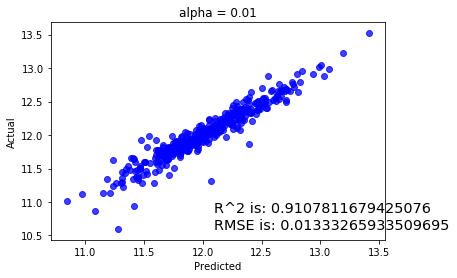

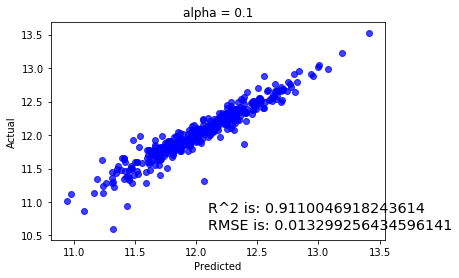

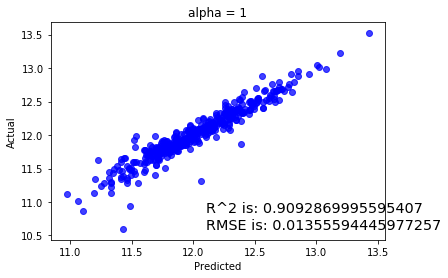

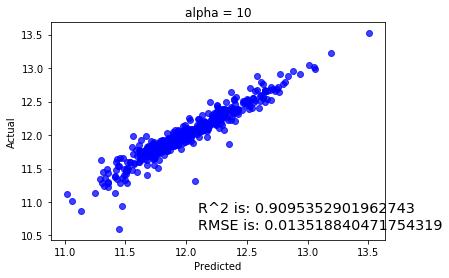

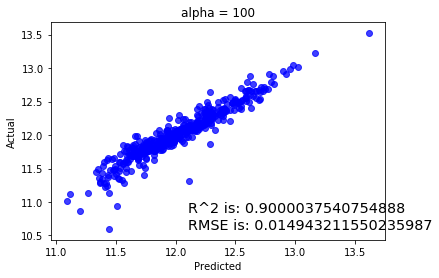

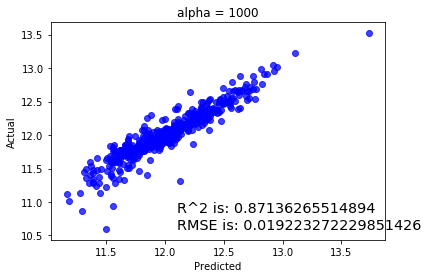

In [104]:
actual_values=y_test
for i in range (-2, 4):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    lm_ridge = rm.fit(X_train, y_train)
    ridge_predict = lm_ridge.predict(X_test)

    plt.scatter(ridge_predict, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    lm_ridge.score(X_test, y_test),
                    mean_squared_error(y_test, ridge_predict))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

## RIDGE MODEL WITH ALPHA = .1

In [106]:
rm = linear_model.Ridge(alpha=.1)

In [107]:
lm_ridge = rm.fit(X_train, y_train)
ridge_predict = lm_ridge.predict(X_test)

In [108]:
print("R^2 for train set: %f" %lm_ridge.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %lm_ridge.score(X_test, y_test))
print('-'*50)
y_predict = lm_ridge.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, y_predict))

R^2 for train set: 0.950958
--------------------------------------------------
R^2 for test  set: 0.911005
--------------------------------------------------
RMSE is: 
 0.013299256434596141


## LASSO

In [25]:
lm_lasso = Lasso()

NameError: name 'r2_score' is not defined

## ELASTIC NET

In [40]:
lm_elastic = ElasticNet()

## 10Fold CROSS VALIDATION w/ Ridge

In [109]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [110]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [111]:
scores = cross_val_score(lm_ridge, X, y, cv=10)
print('Cross-validated scores:',scores)

Cross-validated scores: [0.89767334 0.93283789 0.94277091 0.92285196 0.89182291 0.92055169
 0.9147399  0.9276433  0.93466635 0.90461789]


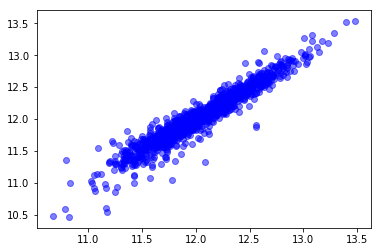

In [112]:
predictions = cross_val_predict(lm_ridge, X, y, cv=10)
plt.scatter(predictions,y,alpha=.5, color='b')

In [114]:
cross_R2 = metrics.r2_score(y,predictions)
cross_RMSE = mean_squared_error(y, predictions)
print(cross_R2)
print(cross_RMSE)

0.9188981010526917
0.012910203287100597


## MODEL FOR SUBMISSION

In [128]:
submit = pd.DataFrame()
submit['Id'] = test.Id
test=test.drop('Id', axis=1)

In [131]:
predictions_log = lm_ridge.predict(test)
predictions = np.exp(predictions_log)

In [135]:
submit['SalePrice'] = predictions
submit.head()

,Id,SalePrice
0,1461,122456.920275
1,1462,165962.053559
2,1463,185476.470255
3,1464,199150.736849
4,1465,197129.145892


In [136]:
submit.to_csv('submission0.csv', index=False)